Name: Beyza Akdeniz

ID: 201101017

Course: YAP476 /BIL573

# Install Packages and Import Libraries

In [2]:
!pip install skimpy

In [3]:
# OS
import os

# Data manipulation
import pandas as pd
pd.set_option('display.max_column', None)
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

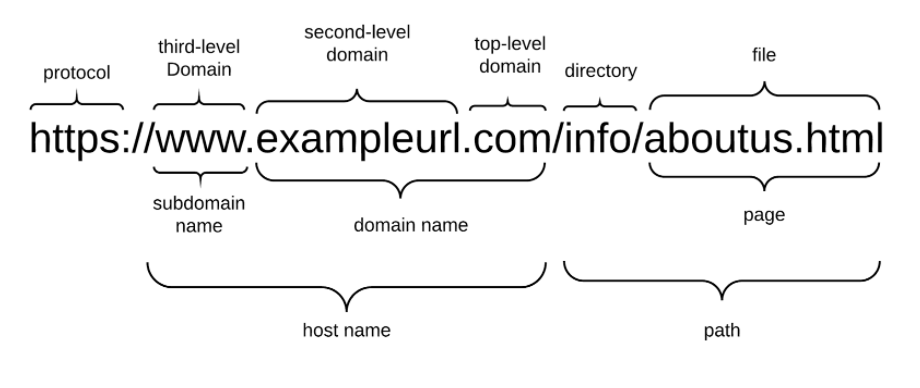

In [5]:
path = "/content/drive/My Drive/Data_Mining_Project/phishing_data"
db_path = path+'/dataset_B/dataset_B_05_2020.csv'
phishing_df = pd.read_csv(db_path)
phishing_df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.00,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.00,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.000000,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.40,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.00,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.00,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,4,4,3,3,8,11,9,11,7.750000,6.00,9.500000,0,0,0,0,0,0,199,0.884422,0.115578,0,0,0,0.043478,0,0.173913,0,1,80.000000,0,21.052632,78.947368,0,0,0,0.000000,0,0,0,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,1,0,0,1,5,0,1,0,0,0,1,1,1,0,0,1,0.023810,0.000000,0,0,1,0,0,3,0,0,0,0,1,0,12,3,3,3,3,10,10,8,5.166667,6.50,4.900000,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,1,1,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.1

In [6]:
phishing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

Checking missing values

In [7]:
phishing_df.isnull().sum()

,0
url,0
length_url,0
length_hostname,0
ip,0
nb_dots,0
...,...
web_traffic,0
dns_record,0
google_index,0
page_rank,0


• Checking unique values

In [8]:
phishing_df.nunique()

,0
url,11429
length_url,324
length_hostname,83
ip,2
nb_dots,19
...,...
web_traffic,4744
dns_record,2
google_index,2
page_rank,11


# EDA

Display Summary Statistics of Data

In [9]:
skim(phishing_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11430  │ │ int64       │ 74    │                                                          │
│ │ Number of columns │ 89     │ │ float64     │ 13    │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA ┃ NA % ┃ mean      ┃ sd      ┃ p0  ┃ p25   ┃ p50    ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ length_url          │  0 │    0 │     61.13 │    55.3 │  12 │    33 │     47 │      71 │     1641 │   ▇    │  │
│ │ length_hostname     │  0 │    0 │     21.09 │   10.78 │   4 │    15 │     19 │      24 │      214 │   ▇▁   │  │
│ │ ip                  │  0 │    0 │    0.1506 │  0.3576 │   0 │     0 │      0 │       0 │        1 │ ▇    ▁ │  │
│ │ nb_dots             │  0 │    0 │     2.481 │    1.37 │   1 │     2 │      2 │       3 │       24 │   ▇    │  │
│ │ nb_hyphens          │  0 │    0 │    0.9976 │   2.087 │   0 │     0 │      0 │       1 │       43 │   ▇    │  │
│ │ nb_at               │  0 │    0 │   0.02222 │  0.1555 │   0 │     0 │      0 │       0 │        4 │   ▇    │  │
│ │ nb_qm               │  0 │    0 │    0.1412 │  0.3645 │   0 │     0 │      0 │       0 │        3 │  ▇ ▁   │  │
│ │ nb_and              │  0 │    0 │    0.1623 │  0.8213 │   0 │     0 │      0 │       0 │       19 │   ▇    │  │
│ │ nb_or               │  0 │    0 │         0 │       0 │   0 │     0 │      0 │       0 │        0 │     ▇  │  │
│ │ nb_eq               │  0 │    0 │    0.2932 │  0.9983 │   0 │     0 │      0 │       0 │       19 │   ▇    │  │
│ │ nb_underscore       │  0 │    0 │    0.3227 │   1.093 │   0 │     0 │      0 │       0 │       18 │   ▇    │  │
│ │ nb_tilde            │  0 │    0 │  0.006649 │ 0.08127 │   0 │     0 │      0 │       0 │        1 │   ▇    │  │
│ │ nb_percent          │  0 │    0 │    0.1231 │   1.466 │   0 │     0 │      0 │       0 │       96 │   ▇    │  │
│ │ nb_slash            │  0 │    0 │      4.29 │   1.882 │   2 │     3 │      4 │       5 │       33 │   ▇    │  │
│ │ nb_star             │  0 │    0 │ 0.0006999 │ 0.02645 │   0 │     0 │      0 │       0 │        1 │   ▇    │  │
│ │ nb_colon            │  0 │    0 │     1.028 │  0.2403 │   1 │     1 │      1 │       1 │        7 │   ▇    │  │
│ │ nb_comma            │  0 │    0 │  0.004024 │  0.1032 │   0 │     0 │      0 │       0 │        4 │   ▇    │  │
│ │ nb_semicolumn       │  0 │    0 │   0.06229 │  0.5982 │   0 │     0 │      0 │       0 │       20 │   ▇    │  │
│ │ nb_dollar           │  0 │    0 │  0.001925 │ 0.07711 │   0 │     0 │      0 │       0 │        6 │   ▇    │  │
│ │ nb_space            │  0 │    0 │   0.03482 │  0.3756 │   0 │     0 │      0 │       0 │       18 │   ▇    │  │
│ │ nb_www              │  0 │    0 │    0.4485 │  0.5019 │   0 │     0 │      0 │       1 │        2 │  ▇  ▆  │  │
│ │ nb_com              │  0 │    0 │     0.128 │   0.37

In [10]:
# List to store features that has just 1 unique value
single_valued_cols = []

for col in phishing_df.columns:
    if phishing_df[col].nunique() == 1:
        single_valued_cols.append(col)

single_valued_cols

['nb_or',
 'ratio_nullHyperlinks',
 'ratio_intRedirection',
 'ratio_intErrors',
 'submit_email',
 'sfh']

Remove single valued features

In [11]:
phishing_df.drop(single_valued_cols, axis=1, inplace=True)

Add new column to keep 'status' values as a numeric value (legitimate: 1, phishing: 0)

In [12]:
phishing_df['target'] = pd.get_dummies(phishing_df['status'])['legitimate'].astype('int')
phishing_df.drop('status',axis = 1, inplace=True)
phishing_df[['url','target']].head(5)

,url,target
0,http://www.crestonwood.com/router.php,1
1,http://shadetreetechnology.com/V4/validation/a...,0
2,https://support-appleld.com.secureupdate.duila...,0
3,http://rgipt.ac.in,1
4,http://www.iracing.com/tracks/gateway-motorspo...,1


In [13]:
phishing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

In [14]:
phishing_df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,target
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.00,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0.875000,0.500000,0,0,80.000000,100.000000,0.000000,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.00,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0.000000,0.000000,0,0,100.000000,80.000000,20.000000,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.000000,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.40,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0.000000,0.000000,0,0,100.000000,0.000000,0.000000,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.00,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0.250000,0.250000,0,0,100.000000,96.428571,3.571429,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.00,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0.537037,0.018519,1,0,76.470588,0.000000,100.000000,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,4,4,3,3,8,11,9,11,7.750000,6.00,9.500000,0,0,0,0,0,0,199,0.884422,0.115578,0,0.043478,0.173913,0,1,80.000000,21.052632,78.947368,0,0,0.000000,0,0,0,0,0,0,448,5396,3980,0,0,6,1
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,1,0,0,1,5,0,1,0,0,0,1,1,1,0,0,1,0.023810,0.000000,0,0,1,0,0,3,0,0,0,0,1,0,12,3,3,3,3,10,10,8,5.166667,6.50,4.900000,0,0,0,0,0,0,3,1.000000,0.000000,0,0.000000,0.000000,0,0,100.000000,0.000000,0.000000,0,0,0.000000,0,0,0,1,0,0,211,6728,0,0,1,0,0
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,1,1,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.142857,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,13,5,1,3,1,15,8,15,6.153846,5.50,6.272727,0,1,0,0,0,0,68,0.470588,0.529412,5,0.000000,0.000000,0,1,6.250000,0.000000,0.000000,0,0,80.000000,0,0,0,0,0,0,2809,8515,8,0,1,10,1
11428,http://www.mypublicdomainpictu

In [15]:
cols = len(phishing_df.axes[1])
cols

83

Distribution of URLs

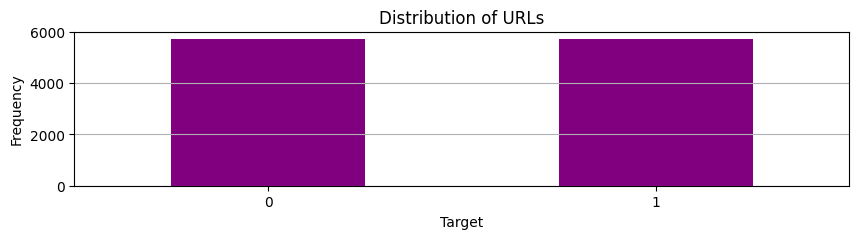

target
0    5715
1    5715
Name: count, dtype: int64


In [16]:
target_counts = phishing_df['target'].value_counts().sort_index()

plt.figure(figsize=(10, 2))
target_counts.plot(kind='bar', color='purple')
plt.title('Distribution of URLs')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print(target_counts)

In [17]:
cat_cols = []
num_cols = []

# Loop through each column except the first column 'url'
for col in phishing_df.columns[1:]:
    unique_ratio = phishing_df[col].nunique() / phishing_df[col].count()

    # Check if the column can be considered as categorical data
    if unique_ratio < 0.002:
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [18]:
num_cols.append('target')

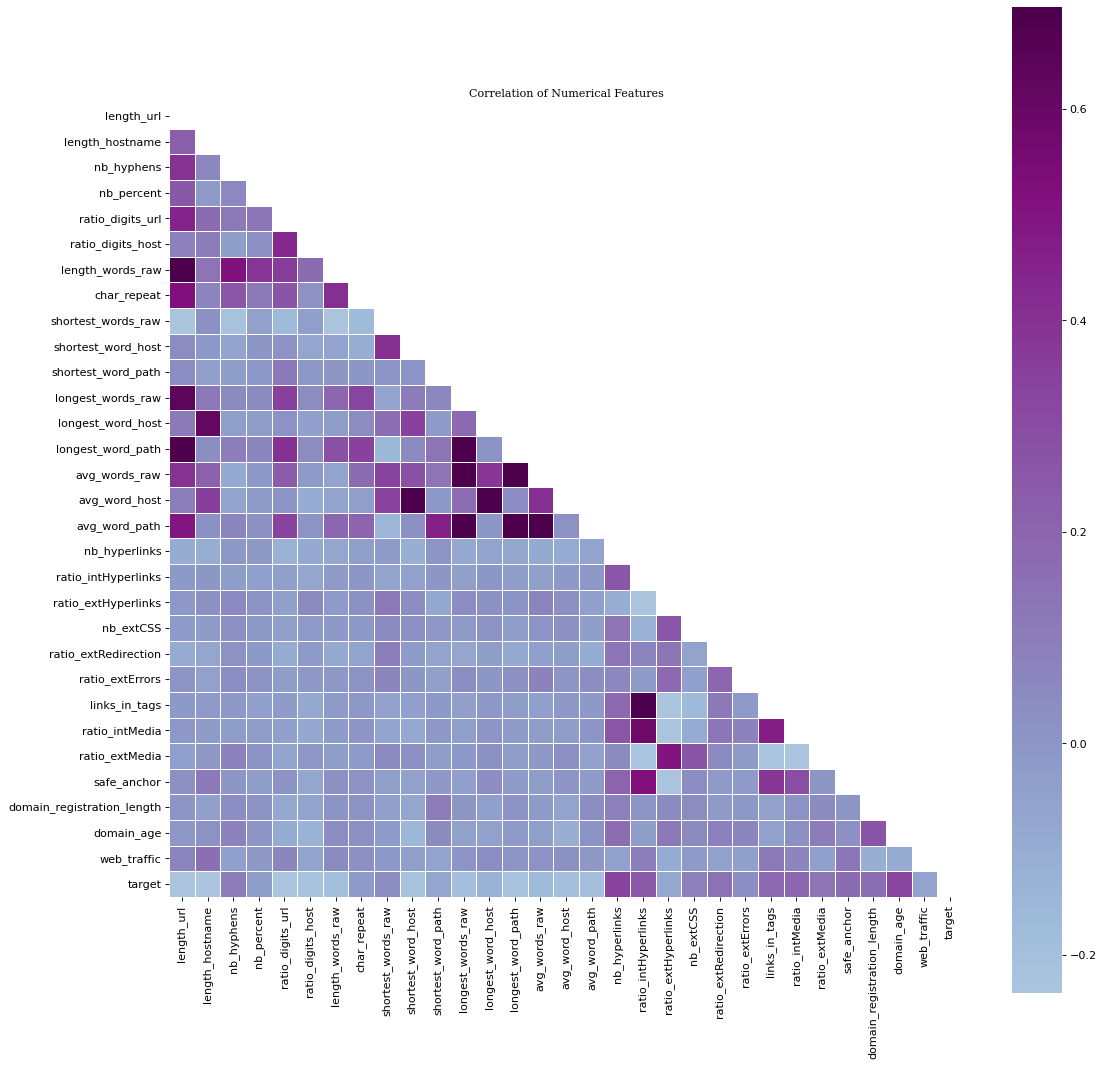

In [19]:
# Get all numerical feature columns
corr = phishing_df[num_cols].corr()

fig = plt.figure(figsize=(16,16),dpi=80)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='BuPu', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation of Numerical Features', fontsize=10,font="Serif")
plt.show()

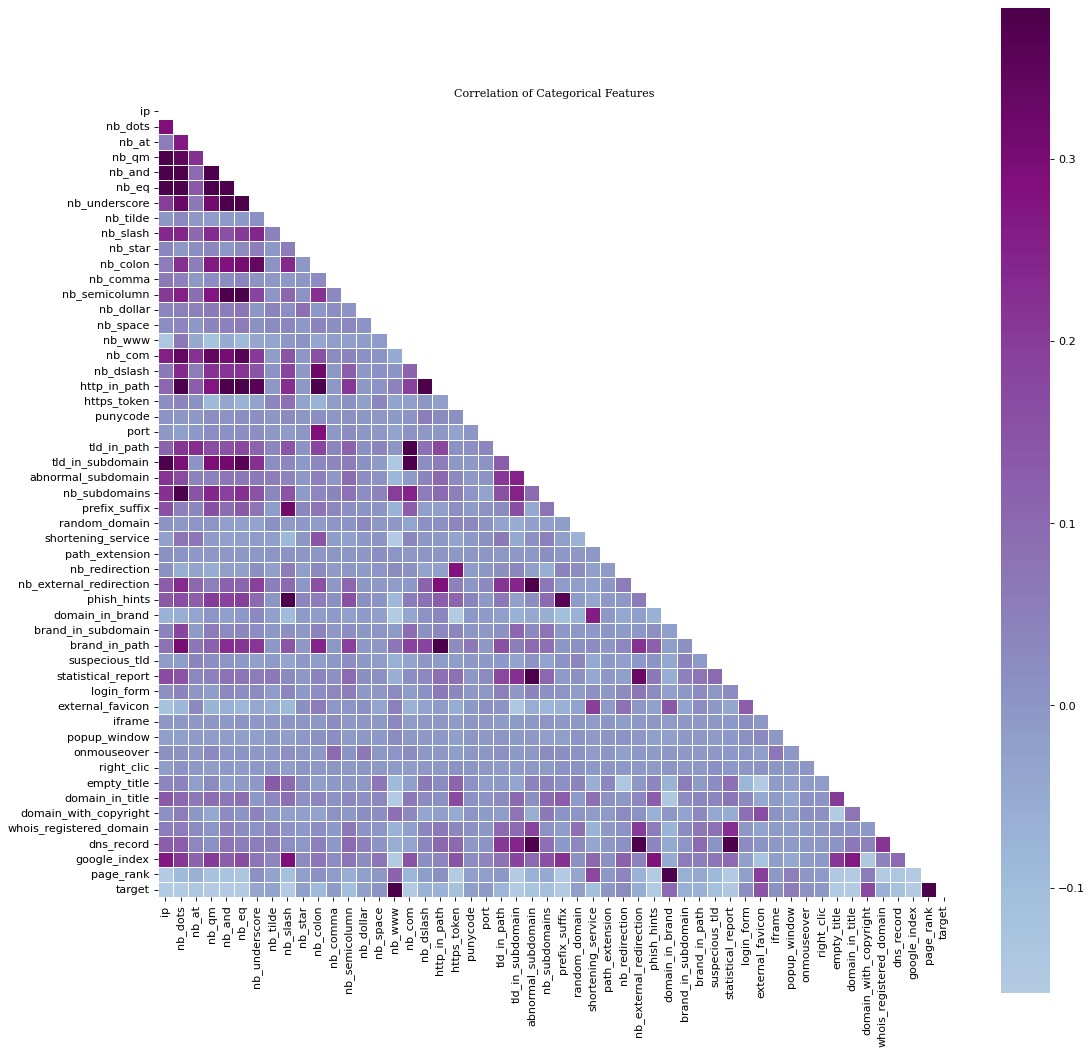

In [20]:
# Get all categorical feature columns
corr = phishing_df[cat_cols].corr()

fig = plt.figure(figsize=(16,16),dpi=80)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='BuPu', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation of Categorical Features', fontsize=10,font="Serif")
plt.show()

Distribution of Variables

In [21]:
# # List of features to visualize

# features = phishing_df.drop(columns=['target', 'url']).columns

# # Plot histograms for each feature
# plt.figure(figsize=(20, 15))
# for i, feature in enumerate(features):
#     plt.subplot(4, 3, i+1)
#     sns.histplot(phishing_df[features], kde=True, color='blue')
#     plt.title(f'Distribution of {features}')
#     plt.xlabel(features)
#     plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

# # Pair-plots for all features
# sns.pairplot(phishing_df[features + ['target']], diag_kind='kde')
# plt.show()

# Classification

In [85]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [23]:
X = phishing_df.drop(columns=['target', 'url'])
y = phishing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f'Training feature set shape: {X_train.shape}')
print(f'Training target set shape: {y_train.shape}')
print(f'Test feature set shape: {X_test.shape}')
print(f'Test target set shape: {y_test.shape}')

Training feature set shape: (9144, 81)
Training target set shape: (9144,)
Test feature set shape: (2286, 81)
Test target set shape: (2286,)


## Random Forest Classifier

Less affected by noise, overfit resistant. But it takes a long time for training and needs memory.

### Hyperparameter Tuning for Random Forest

In [83]:
# Hyperparameter grid for Random Forest

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the grid
param_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, search across 100 different combinations and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid_rf, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)



best_params_rf = rf_random.best_params_
best_score_rf = rf_random.best_score_



print("Best hyperparameters for Random Forest:", best_params_rf)
print("Best cross-validation accuracy for Random Forest:", best_score_rf)



# Train final RF model
best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   8.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  25.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  27.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  20.7s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
123 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best hyperparameters for Random Forest: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best cross-validation accuracy for Random Forest: 0.873025083754121


RandomForestClassifier(bootstrap=False, n_estimators=400)

### Base RF

In [24]:
# Create a RF classifier
clf = RandomForestClassifier()

In [25]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
pd.DataFrame({'importances': clf.feature_importances_}, index=X_train.columns).sort_values(by='importances', ascending=False)

,importances
google_index,0.165132
page_rank,0.103559
web_traffic,0.085450
nb_hyperlinks,0.083204
nb_www,0.048331
...,...
onmouseover,0.000024
nb_external_redirection,0.000000
punycode,0.000000
nb_dollar,0.000000


In [27]:
importances = clf.feature_importances_
index = np.argsort(importances)[::-1]
feature_names = X.columns

In [28]:
feature_names

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent',
       'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn',
       'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash',
       'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
       'punycode', 'port', 'tld_in_path', 'tld_in_subdomain',
       'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain',
       'shortening_service', 'path_extension', 'nb_redirection',
       'nb_external_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks',
      

In [29]:
importances

array([1.78976037e-02, 1.51564015e-02, 5.09154723e-03, 1.16330515e-02,
       9.34383334e-03, 3.72826683e-04, 6.80524419e-03, 1.10222925e-03,
       6.98619438e-03, 2.60558404e-03, 1.26651193e-04, 1.41442905e-03,
       1.20168233e-02, 0.00000000e+00, 8.04893297e-04, 6.47076821e-05,
       3.74607446e-04, 0.00000000e+00, 1.09278041e-03, 4.83306365e-02,
       8.13047720e-04, 2.73244295e-04, 9.51423549e-04, 2.02653945e-03,
       2.34490320e-02, 9.11116047e-03, 0.00000000e+00, 2.58842395e-04,
       5.91266190e-04, 8.39940880e-04, 5.51533842e-04, 3.54929993e-03,
       1.82996362e-03, 8.67187196e-04, 1.81699393e-03, 3.53576434e-05,
       3.83915524e-03, 0.00000000e+00, 1.60913940e-02, 1.24391166e-02,
       7.13548542e-03, 1.08987764e-02, 9.87304324e-03, 1.73236279e-02,
       7.34148982e-03, 2.97535145e-02, 9.37931745e-03, 9.66722602e-03,
       1.22590125e-02, 2.00844472e-02, 4.02424236e-03, 3.85206160e-05,
       1.73980252e-04, 1.63407899e-03, 1.30751274e-03, 8.32040928e-02,
      

In [30]:
sorted_features = np.array(feature_names)[index]

# Map the sorted indices to both feature names and their corresponding importance scores
sorted_importances = importances[index]

for i in range(len(sorted_features)):
    print(f"{sorted_features[i]}: {sorted_importances[i]}")

google_index: 0.16513232672370404
page_rank: 0.10355853776337935
web_traffic: 0.08544989155074419
nb_hyperlinks: 0.0832040927500219
nb_www: 0.0483306365278267
domain_age: 0.03303341832927692
longest_word_path: 0.02975351445610565
safe_anchor: 0.028107160870949586
ratio_intHyperlinks: 0.0274170348786581
ratio_digits_url: 0.023449031990853308
ratio_extHyperlinks: 0.023060488657283097
phish_hints: 0.02008444718863991
links_in_tags: 0.01933826393256184
length_url: 0.0178976036892644
ratio_extRedirection: 0.017516690292189933
longest_words_raw: 0.01732362789553734
length_words_raw: 0.016091394025377743
length_hostname: 0.01515640146131702
domain_registration_length: 0.012747695743907467
char_repeat: 0.012439116595863973
avg_word_path: 0.012259012514339007
nb_slash: 0.01201682333117625
nb_dots: 0.011633051495568127
shortest_word_host: 0.010898776399953089
shortest_word_path: 0.00987304324431172
avg_word_host: 0.009667226024564194
domain_in_title: 0.009468685143532241
avg_words_raw: 0.0093793

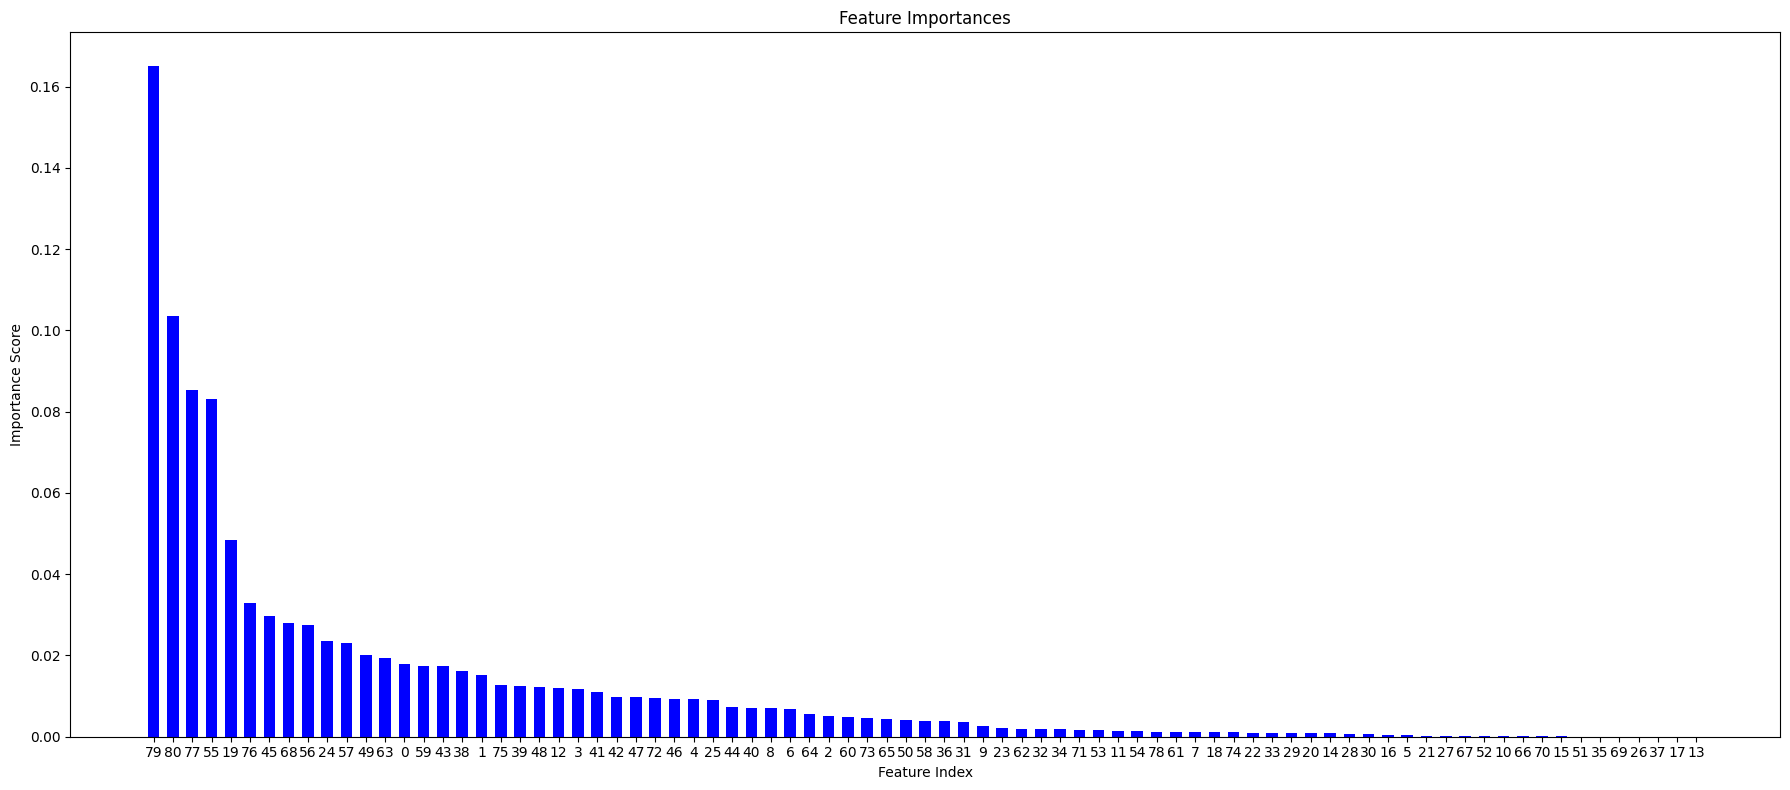

In [31]:
plt.figure(figsize=(18, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[index], color='b', width=0.6, align='center')
plt.xticks(range(X.shape[1]), index)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [32]:
# Create a mask to select features with importance > 0.01
mask = importances > 0.01

# Get the names/indices of selected features
selected_features = np.array(feature_names)[mask]


# Get the importance scores of selected features
selected_importances = importances[mask]


# Optionally, you can print or store the selected features and their scores
print("Selected Features:")
for feature, score in zip(selected_features, selected_importances):
    print(f"{feature}: {score}")

Selected Features:
length_url: 0.0178976036892644
length_hostname: 0.01515640146131702
nb_dots: 0.011633051495568127
nb_slash: 0.01201682333117625
nb_www: 0.0483306365278267
ratio_digits_url: 0.023449031990853308
length_words_raw: 0.016091394025377743
char_repeat: 0.012439116595863973
shortest_word_host: 0.010898776399953089
longest_words_raw: 0.01732362789553734
longest_word_path: 0.02975351445610565
avg_word_path: 0.012259012514339007
phish_hints: 0.02008444718863991
nb_hyperlinks: 0.0832040927500219
ratio_intHyperlinks: 0.0274170348786581
ratio_extHyperlinks: 0.023060488657283097
ratio_extRedirection: 0.017516690292189933
links_in_tags: 0.01933826393256184
safe_anchor: 0.028107160870949586
domain_registration_length: 0.012747695743907467
domain_age: 0.03303341832927692
web_traffic: 0.08544989155074419
google_index: 0.16513232672370404
page_rank: 0.10355853776337935


In [68]:
selected_columns = [
    "length_url", "length_hostname", "nb_dots", "nb_slash", "nb_www",
    "ratio_digits_url", "length_words_raw", "char_repeat", "shortest_word_host",
    "longest_words_raw", "longest_word_path", "avg_word_path", "phish_hints",
    "nb_hyperlinks", "ratio_intHyperlinks", "ratio_extHyperlinks", "ratio_extRedirection",
    "links_in_tags", "safe_anchor", "domain_registration_length", "domain_age",
    "web_traffic", "google_index", "page_rank"
]

selected_df = phishing_df[selected_columns]

selected_df.head()

,length_url,length_hostname,nb_dots,nb_slash,nb_www,ratio_digits_url,length_words_raw,char_repeat,shortest_word_host,longest_words_raw,longest_word_path,avg_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_extRedirection,links_in_tags,safe_anchor,domain_registration_length,domain_age,web_traffic,google_index,page_rank
0,37,19,3,3,1,0.000000,4,4,3,11,6,4.500000,0,17,0.529412,0.470588,0.875000,80.000000,0.0,45,-1,0,1,4
1,77,23,1,5,0,0.220779,4,4,19,32,32,14.666667,0,30,0.966667,0.033333,0.000000,100.000000,100.0,77,5767,0,1,2
2,126,50,4,5,0,0.150794,12,2,3,17,17,8.142857,0,4,1.000000,0.000000,0.000000,100.000000,100.0,14,4004,5828815,1,0
3,18,11,2,2,0,0.000000,1,0,5,5,0,0.000000,0,149,0.973154,0.026846,0.250000,100.000000,62.5,62,-1,107721,0,3
4,55,15,2,5,1,0.000000,6,3,3,11,11,7.000000,0,102,0.470588,0.529412,0.537037,76.470588,0.0,224,8175,8725,0,6


In [79]:
X_s = selected_df
y_s = y

X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X_s, y_s, test_size=0.20, random_state=42)

In [80]:
# Create a RF classifier
final_clf = RandomForestClassifier()
final_clf.fit(X_train_s, y_train_s)

RandomForestClassifier()

# Final Evaluation and Summary

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [95]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_1 = f1_score(y_test, y_pred, average='macro')

print(f"Base Accuracy: {accuracy}")
print(f"Base Precision: {precision}")
print(f"Base Recall: {recall}")
print(f"Base F1 Score: {f1_1}")

Base Accuracy: 0.9706911636045494
Base Precision: 0.9707824331609772
Base Recall: 0.9706278186538136
Base F1 Score: 0.9706826306042465


In [96]:
y_pred_s = final_clf.predict(X_test_s)
accuracy = accuracy_score(y_test_s, y_pred_s)
precision = precision_score(y_test_s, y_pred_s, average='macro')
recall = recall_score(y_test_s, y_pred_s, average='macro')
f1_2 = f1_score(y_test_s, y_pred_s, average='macro')

print(f"Final Accuracy: {accuracy}")
print(f"Final Precision: {precision}")
print(f"Final Recall: {recall}")
print(f"Final F1 Score: {f1_2}")

Final Accuracy: 0.9619422572178478
Final Precision: 0.9619533594659153
Final Recall: 0.961920470230499
Final F1 Score: 0.9619352572856368


In [97]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_3 = f1_score(y_test, y_pred, average='macro')

print(f"Tuned Accuracy: {accuracy}")
print(f"Tuned Precision: {precision}")
print(f"Tuned Recall: {recall}")
print(f"Tuned F1 Score: {f1_3}")

Tuned Accuracy: 0.9706911636045494
Tuned Precision: 0.9707375452524027
Tuned Recall: 0.9706492540112827
Tuned F1 Score: 0.9706842915906397
